P452 MIDSEM EXAM 

Name: Pabitra Ranjan Giri
Roll: 2011103
Course: P452 Midsem Examination

QUESTION 1

In [1]:
import mylibrary.nr as nr  # Newton raphson library file
import mylibrary.rf as rf  # Regula falsi library file
import math

def f(x):    # Given function
    return math.log(0.5*x) - math.sin(2.5*x)

def d(x):    # Derivative of given function
    return ((1/x) - (2.5*math.cos(2.5*x)))

a=1.5
b=2.5
rf.main(f,a,b)
print("")
print("")
nr.main(f,d,2.2)

REGULA-FALSI
------------
Iterations:
11.801724402995978
3.331808148122123
2.6129970798432707
2.650113267327452
2.6232515278445754
2.623140751344172
No. of Iterations: 6
The required root is: 2.623140751344172


NEWTON-RAPHSON
--------------
Initial guess for newton raphson= 2.2
Iterations:
2.8080273965694733
2.585564275463139
2.6227428603830814
2.6231402751560946
No. of Iterations: 4
The required root is: 2.6231402751560946


QUESTION 2

Initial guess slope =  10
Final value of slope =  12.505494528475454


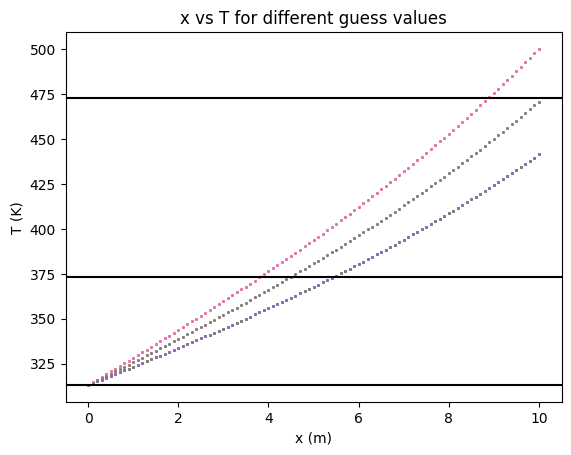

T = 100.0 C is at x = 4.482700000002891


In [2]:
import mylibrary.shoot as shoot  # Library file for Shooting method
# RK4 method is used inside shooting method library file

def dzdx(z,y,x):     # Differential d2T/dx2     # z = dT/dx      # y = T
    return 0.01*(y-293.15)

def dydx(z,y,x):     # Differential dT/dx    
    return (z)

x0=0.0
y0=40.0+273.15 #In Kelvin scale  # Temperature at x=0
xn=10.0        # xn = L = 10 m
dx=0.1
a=40.0+273.15 #In Kelvin scale   # Temperature at x=0
b=200.0+273.15 #In Kelvin scale  # Temperature at x=L
ci=10  # Initial guess value for shooting method

T=100+273.15 #In Kelvin scale   # Required Temperature
x_T=shoot.main(x0,y0,xn,dx,a,b,ci,dydx,dzdx,T)
print("T =",T-273.15,"C is at x =",x_T)

# 3 horizontal lines indicate temperatures
# 313.15K , 373.15K , 473.15K


QUESTION 3 using forward explicit method

alpha =  0.019999999999999997


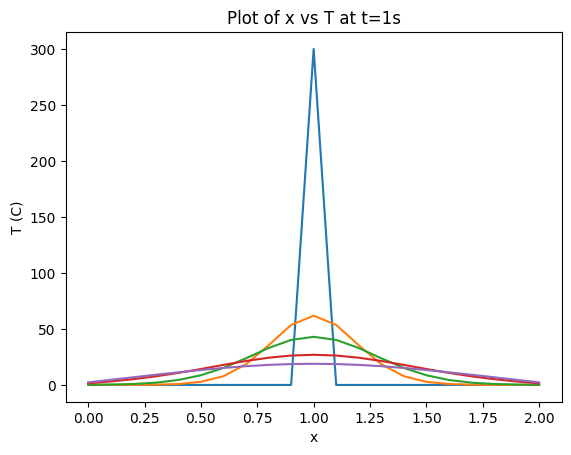

In [5]:
import matplotlib.pyplot as plt
import math

# Solution of 1-D heat equation using forward explicit method

def pde():
    lx=2
    nx=20
    lt=20
    nt=100000

    hx=lx/nx
    ht=lt/nt
    a=ht/(hx*hx)
    V0=[0.0]*(nx+1)
    V1=[0.0]*(nx+1)
    T0=[]
    print('alpha = ',a)

    for i in range (0,nx+1):
        V0[i]=0.0
        T0.append(hx*i)
    V0[int(nx/2)]=300
    plt.plot(T0,V0)
    for i in range (1,1001):
        for j in range (0,nx+1):
            if j==0:
                V1[j]=(1-2*a)*V0[j]  +  a*V0[j+1]
            elif (j==nx):
                V1[j]=a*V0[j-1]  +  (1-2*a)*V0[j]
            else:
                V1[j]=a*V0[j-1]  +  (1-2*a)*V0[j]  +  a*V0[j+1]
        
        for k in range (0,nx+1):
            V0[k]=V1[k]
        if i==100 or i==200 or i==500 or i==1000 or i==2000 or i==5000 or i==10000 or i==20000 :
            plt.plot(T0,V0)
    plt.title("Plot of x vs T at t=1s")
    plt.xlabel("x")
    plt.ylabel("T (C)")
        
pde()
plt.show()
    



Question 3 using Crank Nicolson method (For showing countour surface plot)

Alpha =  0.024999999999999994
Solution Table:
[[3.73150000e+02 3.39156965e+02 3.11088002e+02 ... 1.45604299e-01
  1.44615399e-01 1.43633216e-01]
 [3.73150000e+02 3.71603225e+02 3.67507453e+02 ... 2.81285905e-01
  2.79375498e-01 2.77478065e-01]
 [3.73150000e+02 3.73113981e+02 3.72946965e+02 ... 3.97798342e-01
  3.95096618e-01 3.92413243e-01]
 ...
 [3.73150000e+02 3.73113981e+02 3.72946965e+02 ... 3.97798342e-01
  3.95096618e-01 3.92413243e-01]
 [3.73150000e+02 3.71603225e+02 3.67507453e+02 ... 2.81285905e-01
  2.79375498e-01 2.77478065e-01]
 [3.73150000e+02 3.39156965e+02 3.11088002e+02 ... 1.45604299e-01
  1.44615399e-01 1.43633216e-01]]


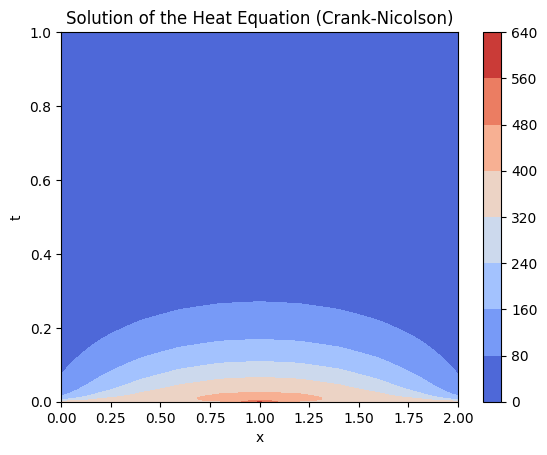

In [1]:
import mylibrary.crnk as crnk #Importing Crank-Nicolson differential equation solver library file
import mylibrary.gji as gji #Importing Gauss Jordan matrix inverter library file
import mylibrary.mm as mm #Importing Matrix multiplication library file
import numpy as np

L = 2  # Length of the rod
T = 1  # Total time
Nx = 10  # Number of spatial points
Nt = 1000  # Number of time steps
alpha = (T/Nt)/((L/Nx)**2)
print("Alpha = ", alpha)

A=[]
B=[]
for i in range(Nx + 1):
    row=[]
    for j in range(Nx + 1):
        row.append(0.0)
    A.append(row)

for i in range(Nx + 1):
    row=[]
    for j in range(Nx + 1):
        row.append(0.0)
    B.append(row)

A=np.matrix(A)
B=np.matrix(A)

# Initialize solution matrix
u=[]
for i in range(Nx + 1):
    row=[]
    for j in range(Nt + 1):
        row.append(0.0)
    u.append(row)

u=np.matrix(u)
#Initial condition
for i in range (Nx+1):
    if (i==((Nx/2))):
        u[i,0]=573.15
    else:
        u[i,0]=373.15

# Crank-Nicolson time-stepping module
# The values of matrix A and B are calculated manually
for i in range (Nx+1):
    for j in range (Nx+1):
        if i==j:
            A[i,j]=1+(4*alpha)
            B[i,j]=1-(4*alpha)
        elif abs(i-j)==1:
            A[i,j]=(-2*alpha)
            B[i,j]=(2*alpha)
        else:
            A[i,j]=0
            B[i,j]=0
AI=gji.main(A)
C=mm.main(AI,B)
crnk.main(L,T,Nx,Nt,u,C)

# The Crank-Nicolson parameter(alpha) is selected for which the contour plot is most stable.

QUESTION 4

In [8]:
import mylibrary.simp as simp # Numerical integrator using Simpson method library file

def lmbda(x):
    return x**2
def xlambda(x):
    return x*(lmbda(x))

com = simp.main(xlambda,0,2,1000)/simp.main(lmbda,0,2,1000)
print("Estimated centre of mass by Simpson method =",com,"m")
print("Rounding to 4 decimal places we get =",round(com,4),"m")
print("Actual value of centre of mass =",1.5,"m\n")

Estimated centre of mass by Simpson method = 1.500000000000002 m
Rounding to 4 decimal places we get = 1.5 m
Actual value of centre of mass = 1.5 m



QUESTION 5

In [1]:
import mylibrary.lud as lud # LU Decomposition linear equation solver library file

path="D:\\P452 codes\\matrix.csv"  # File path of the augmented matrix file
lud.main(path)

The input augmented matrix is : 

1.0          -1.0          4.0          0.0          2.0          9.0          19.0          

0.0          5.0          -2.0          7.0          8.0          4.0          2.0          

1.0          0.0          5.0          7.0          3.0          -2.0          13.0          

6.0          -1.0          2.0          3.0          0.0          8.0          -7.0          

-4.0          2.0          0.0          5.0          -5.0          3.0          -9.0          

0.0          7.0          -1.0          5.0          4.0          -2.0          2.0          



The solution of the given linear equations using LU decomposition method is : 

a1 = -1.761817043997862
a2 = 0.8962280338740133
a3 = 4.051931404116158
a4 = -1.6171308025395421
a5 = 2.041913538501913
a6 = 0.15183248715593525
